# Manipulação de dados financeiros com pandas

O objetivo deste notebook é sistematizar o processo de criação de algumas variáveis financeiras em Python, usando a biblioteca de manipulação pandas e matplotlib para visualizar os dados.

## Tipos de variáveis financeiras

- **Diferença de preço**: a diferença do preço do dia em relação ao dia anterior
- **Retorno diário**: a diferença percentual do preço do dia em relação ao dia anterior
- **Direção**: variável indicando resultado de alta ou baixa
- **Média móvel**: preço médio para intervalos de tempo

Estão são as variáveis que serão criadas e analisadas a seguir.

## Carregar bibliotecas

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

## Importar dados

In [10]:
fb = pd.read_csv('../data/facebook.csv', parse_dates = ['Date'], index_col = ['Date'])
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


## Criar novas variáveis

### Calcular diferença de preço

Aqui quero identificar a diferença no preço das ações de um dia para o outro. Isto demanda dois passos.

O primeiro passo é criar uma coluna com os preços dos dias anteriores:

In [12]:
fb['close_ontem'] = fb['Close'].shift(1)
fb.head()

,Open,High,Low,Close,Adj Close,Volume,close_ontem
Date,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,NaN
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,20.049999
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,20.129999
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.790001
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.190001


O que a função `.shift()` faz é descer os valores da coluna especificada o tanto de linhas indicadas no argumento. Outra forma de pensar no que ela faz: os valores iniciarão a partir da linha indicada no argumento.

Assim, o que fiz acima com `.shift(1)` foi descer os valores "Close" uma linha, ou determinar que comecem a partir da observação 1, não da observação 0.

Como resultado, cada observação tem tanto o valor de fechamento da ação naquele dia como o valor que fechou no dia anterior. Com isto sim é possível calcular a diferença de preço, no caso diária.

In [13]:
fb["precodiff"] = fb['Close'] - fb['close_ontem']
fb.head()

,Open,High,Low,Close,Adj Close,Volume,close_ontem,precodiff
Date,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,NaN,NaN
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,20.049999,0.080000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,20.129999,-0.339998
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.790001,-0.600000
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.190001,-0.050002


Agora sabemos, por exemplo, que de 31 de dezembro de 2014 para 02 de janeiro de 2015 houve alta de 0,08, mas que nos dias seguintes as ações caíram 0,99 pontos.

### Calcular retorno diário

In [19]:
fb['retorno_dia'] = fb['precodiff'] / fb['Close']
fb.head()

,Open,High,Low,Close,Adj Close,Volume,close_ontem,precodiff,retorno_dia
Date,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,NaN,NaN,NaN
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,20.049999,0.080000,0.003974
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,20.129999,-0.339998,-0.017180
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.790001,-0.600000,-0.031266
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.190001,-0.050002,-0.002612


### Identificar "direção" do dia

Em inglês chama-se esta variável de *direction*, que seria literalmente direção em português. Isto é, a ação naquele dia fechou em alta ou em baixa? No fechamento, ela havia movido-se para cima ou para baixo?

Será uma variável boolenana, com valor 1 para variações positivas e -1 para variações nulas ou negativas.

In [30]:
fb['direcao'] = [1 if fb.loc[x, 'precodiff'] > 0 else -1 for x in fb.index]
fb.head()

,Open,High,Low,Close,Adj Close,Volume,close_ontem,precodiff,retorno_dia,direcao
Date,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,NaN,NaN,NaN,-1
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,20.049999,0.080000,0.003974,1
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,20.129999,-0.339998,-0.017180,-1
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.790001,-0.600000,-0.031266,-1
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.190001,-0.050002,-0.002612,-1


O conjunto da função acima diz:

> `direcao` será 1 se a variação `precodiff` for positiva e -1 se 0 ou negativa

Mas para compreendê-la bem:

- "`x`" é a função que indexa cada observação
- "`1 if fb.loc[x, 'precodiff'] > 0`" diz: quero 1 para `direcao` se `precodiff` é positivo
- "`else -1 for x in fb.index`" diz: senão será -1 para qualquer index (`x`) de `fb`, considerando a condição expressa acima. 

### Calcular média móvel

Já a média móvel é computada como a média de um intervalo de dias, naquele dia. Este índice é útil porque suaviza ruídos da distribuição temporal e pode ser usado para identificar a tendência de ações na bolsa de valores.

> Este tipo de índice também é usado, por exemplo, para mensurar a inflação. Quando falam sobre inflação acumulada nos últimos 90 dias, estão tratando de uma soma móvel. É a soma dos últimos 90 dias de inflação. No dia seguinte esta soma será diferente, pois o dia mais antigo sairá da soma e entrará o dia mais recente.

Vou criar uma variável com a média móvel para um período de três dias, da forma bruta, para compreender o cálculo.

In [31]:
fb['media3'] = (fb['Close'] + fb['Close'].shift(1) + fb['Close'].shift(2)) / 3
fb.head()

,Open,High,Low,Close,Adj Close,Volume,close_ontem,precodiff,retorno_dia,direcao,media3
Date,,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,NaN,NaN,NaN,-1,NaN
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,20.049999,0.080000,0.003974,1,NaN
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,20.129999,-0.339998,-0.017180,-1,19.990000
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.790001,-0.600000,-0.031266,-1,19.703334
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.190001,-0.050002,-0.002612,-1,19.373334


Trata-se de um cálculo simples. Para a média móvel de três dias, por exemplo, eu somo os preços de um dia com seus dois dias seguintes, extraídos com `.shift()`, e divido pelo número de dias que estou somando, no caso 3.

Para uma média móvel com este período até pode ser razoável calcular na unha. Mas e se quisermos a média móvel para períodos de 40 ou 200 dias? É para isto que serve a função `.rolling()`. Ela estabelecerá um período que será computado pela função indicada na sequência.

Vou recalcular a média móvel de 3 dias para ver a diferença na aplicação para obter o mesmo resultado.

In [33]:
fb['media3'] = fb['Close'].rolling(3).mean()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,close_ontem,precodiff,retorno_dia,direcao,media3
Date,,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,NaN,NaN,NaN,-1,NaN
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,20.049999,0.080000,0.003974,1,NaN
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,20.129999,-0.339998,-0.017180,-1,19.990000
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.790001,-0.600000,-0.031266,-1,19.703334
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.190001,-0.050002,-0.002612,-1,19.373334


Este "indicador móvel" é útil pois permite uma comparação estocástica da variação periódica, o que revela a tendência das ações e ajuda a determinar níveis de segurança de investimentos.

Essa análise é feita com criação de indicadores chamados "fast signal" e "slow signal", no qual o primeiro é mais sensível às variações diárias e o segundo é menos sensível a elas.

In [50]:
fb['media45'] = fb['Close'].rolling(45).mean()
fb['media180'] = fb['Close'].rolling(200).mean()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,close_ontem,precodiff,retorno_dia,direcao,media3,media15,media45,media180
Date,,,,,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,20.049999,0.080000,0.003974,1,NaN,NaN,NaN,NaN
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,20.129999,-0.339998,-0.017180,-1,19.990000,NaN,NaN,NaN
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.790001,-0.600000,-0.031266,-1,19.703334,NaN,NaN,NaN
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.190001,-0.050002,-0.002612,-1,19.373334,NaN,NaN,NaN


Agora vou visualizar os preços diários com as médias móveis de 45 e 200 dias, para compreender seus resultados.

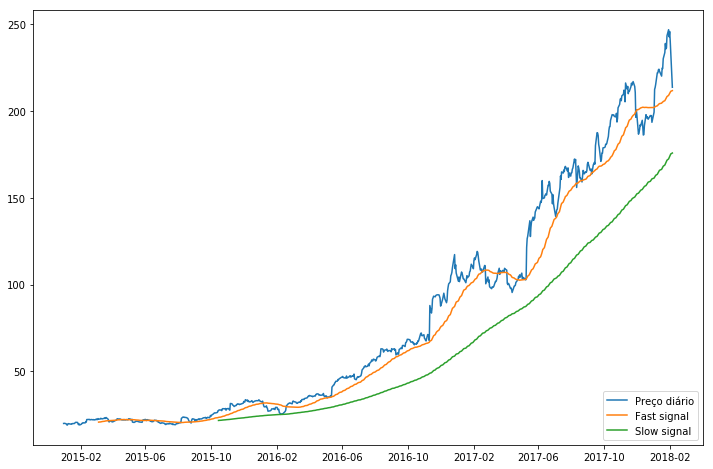

In [56]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(fb['Close'], label = 'Preço diário')
ax.plot(fb['media45'], label = 'Fast signal')
ax.plot(fb['media180'], label = 'Slow signal')
ax.legend(loc = 'lower right');

A visualização mostra que a variação da fast sign é mais próxima da variação do preço diário, enquanto a slow sign é mais consistente.

> Alguns investidores dizem que se fast sign > slow sign, então aquela ação deverá seguir tendência de alta por algum período.